# Exploration

Exploring the preprocessed raw data

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rcParams['font.size'] = 16
plt.rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [3]:
def gen_stats(df):
    
    return [np.max(df.values), np.min(df.values), np.std(df.values)]

In [4]:
def stats_table(datasets, index=None):
    
    _stats = []
    for dataset in datasets:
        _stats.append(gen_stats(dataset))
        
    df = pd.DataFrame(
        np.array(_stats, dtype=float), columns=['Max', 'Min', 'Std'], index=index
    )
    
    return df

In [5]:
# Load datasets into memory.
orig_pvalues = pd.read_csv(
    './../data/train/orig_pvalues_prep.csv', sep=',', index_col=0
)
orig_ccp = pd.read_csv(
    './../data/train/orig_pcc_prep.csv', sep=',', index_col=0
)
sel_pvalues = pd.read_csv(
    './../data/train/significant_pvalues_prep.csv', sep=',', index_col=0
)
sel_ccp = pd.read_csv(
    './../data/train/significant_pcc_prep.csv', sep=',', index_col=0
)

In [7]:
df = stats_table(
    [orig_pvalues, orig_ccp, sel_pvalues, sel_ccp],
    index=['org_pvalues', 'org_ppc', 'sel_pvalues', 'sel_pcc']
)

print('Statistics: \n{}'.format(df))

Statistics: 
                      Max           Min           Std
org_pvalues  1.000000e+00  1.280734e-32  2.256814e-01
org_ppc      8.524432e-01 -8.669647e-01  3.232601e-01
sel_pvalues  1.506513e-11  0.000000e+00  4.960937e-13
sel_pcc      8.524432e-01 -8.669647e-01  6.393041e-02


In [8]:
print('Number of unique corrected p-values: {} and size of data matrix: {}'
      ''.format(np.unique(orig_pvalues.values).size, orig_pvalues.values.size)
)

Number of unique corrected p-values: 73422504 and size of data matrix: 73422504


In [9]:
print('Number of ccp unique values: {} and size of data matrix: {}'
      ''.format(np.unique(orig_ccp).size, orig_ccp.values.size)
)

Number of ccp unique values: 73422502 and size of data matrix: 73422504


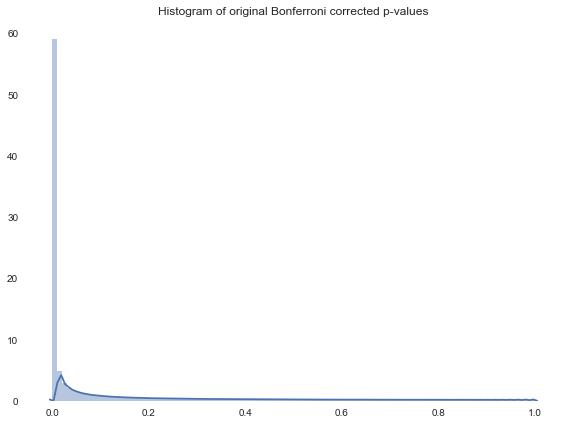

In [10]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Bonferroni corrected p-values')
sns.distplot(orig_pvalues.values.ravel(), bins=100)
plt.tight_layout()

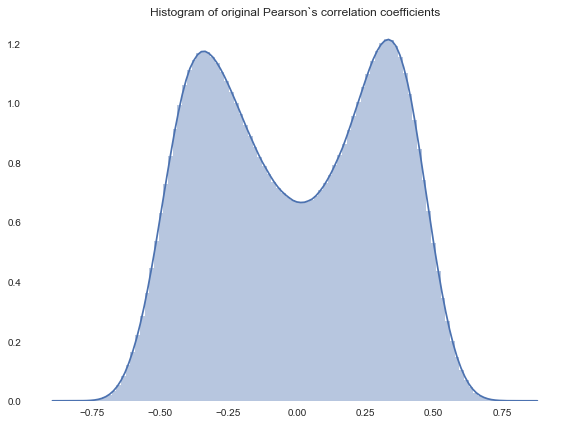

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Pearson`s correlation coefficients')
sns.distplot(orig_ccp.values.ravel(), bins=100)
plt.tight_layout()

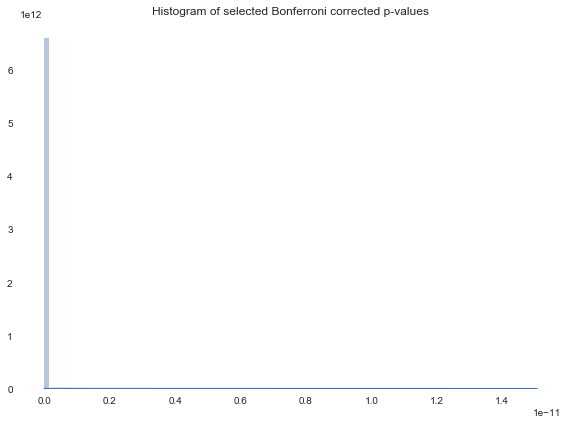

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of selected Bonferroni corrected p-values')
sns.distplot(sel_pvalues.values.ravel(), bins=100)
plt.tight_layout()

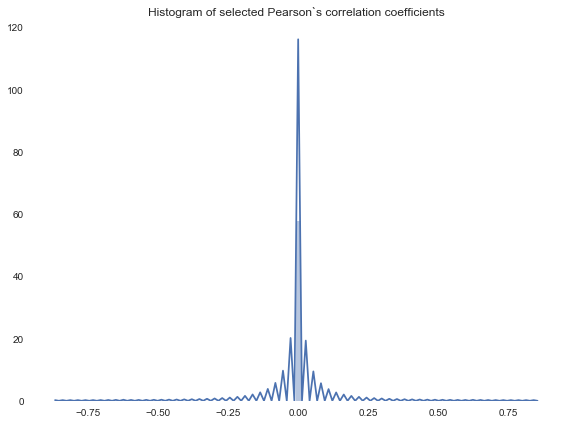

In [15]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of selected Pearson`s correlation coefficients')
sns.distplot(sel_ccp.values.ravel(), bins=100)
plt.tight_layout()

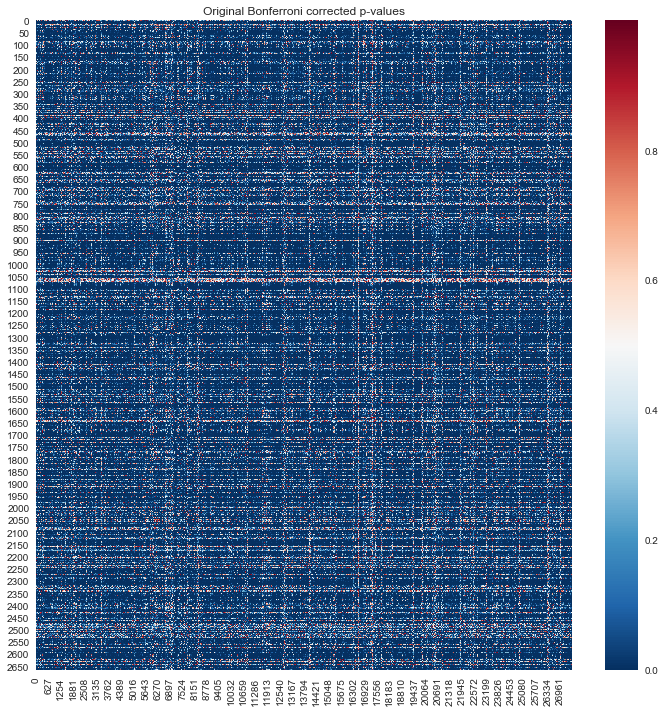

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Original Bonferroni corrected p-values')
sns.heatmap(
    orig_pvalues.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', 
    vmin=np.min(orig_pvalues.values), vmax=np.max(orig_pvalues.values)
)
plt.tight_layout()
plt.savefig('./../data/imgs/org_pvalues.png')

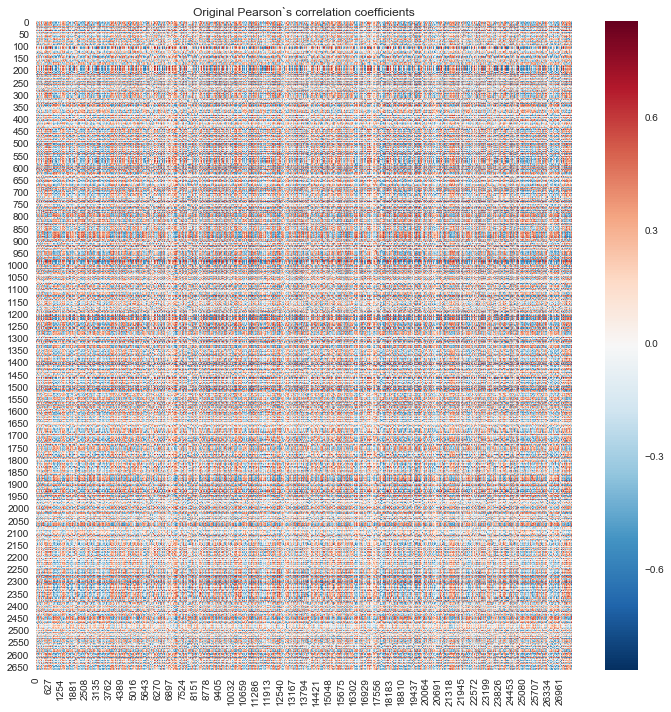

In [17]:
plt.figure(figsize=(10, 10))
plt.title('Original Pearson`s correlation coefficients')
sns.heatmap(
    orig_ccp.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', 
    vmin=np.min(orig_ccp.values), vmax=np.max(orig_ccp.values)
)
plt.tight_layout()
plt.savefig('./../data/imgs/org_ccp.png')

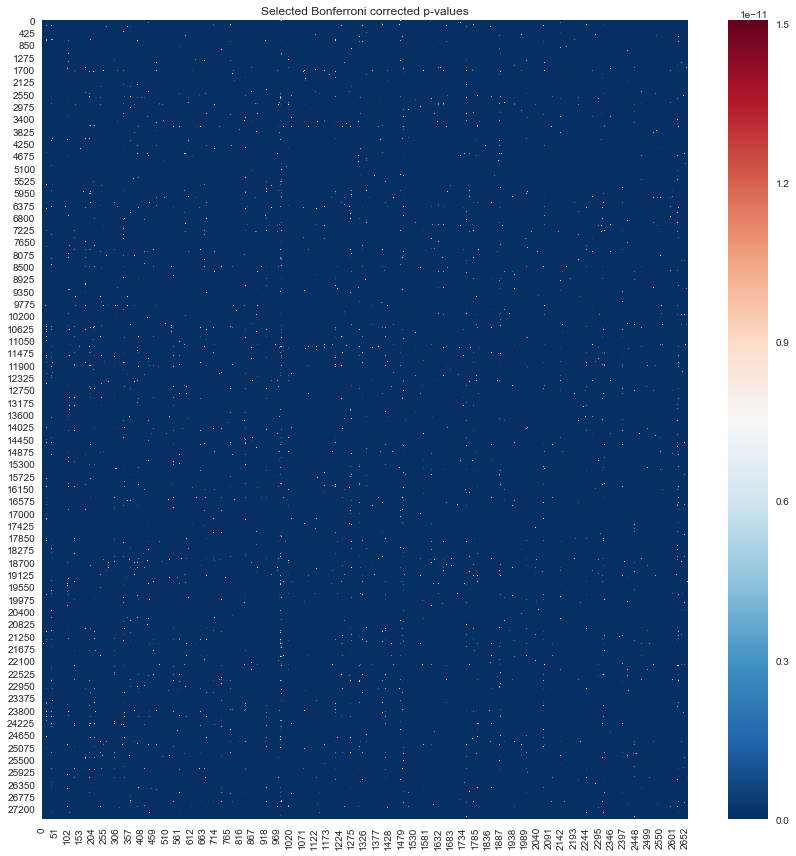

In [18]:
plt.figure(figsize=(12, 12))
plt.title('Selected Bonferroni corrected p-values')
sns.heatmap(
    sel_pvalues.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', 
    vmin=np.min(sel_pvalues.values), vmax=np.max(sel_pvalues.values)
)
plt.tight_layout()
plt.savefig('./../data/imgs/sel_pvalues.png')

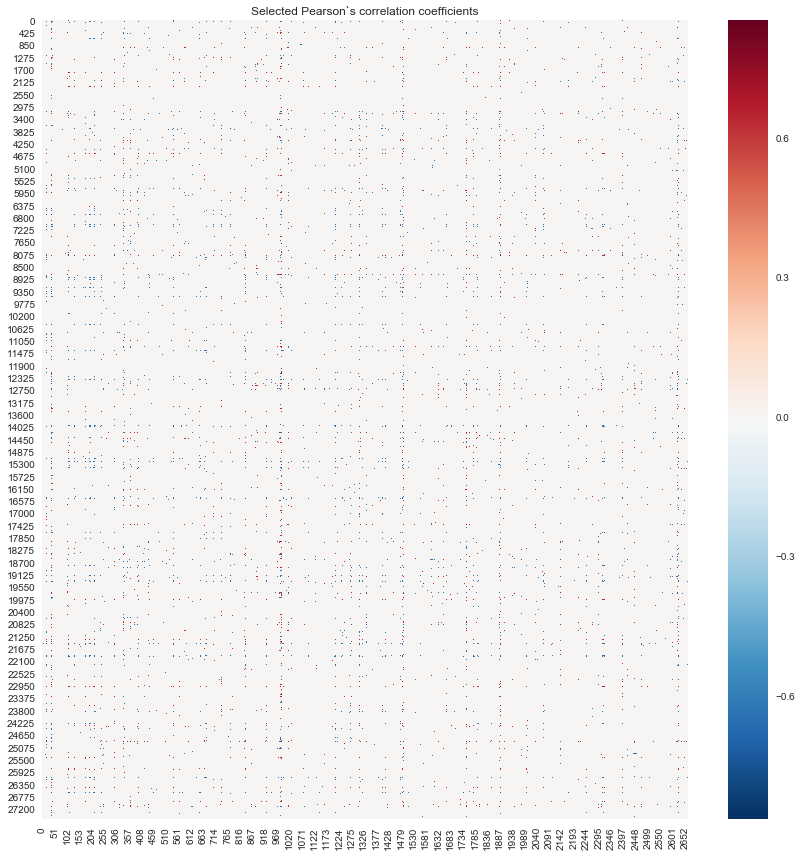

In [19]:
plt.figure(figsize=(12, 12))
plt.title('Selected Pearson`s correlation coefficients')
sns.heatmap(
    sel_ccp.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', 
    vmin=np.min(sel_ccp.values), vmax=np.max(sel_ccp.values)
)
plt.tight_layout()
plt.savefig('./../data/imgs/sel_ccp.png')